# Computing Vision - Basics

### Check Directory

In [7]:
import os

current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /drive/notebooks


## Basic Image operations

### Load and Display an Image.

Loading an image is the first step in any image processing task. Images can be read from files or acquired from cameras or other sensors.

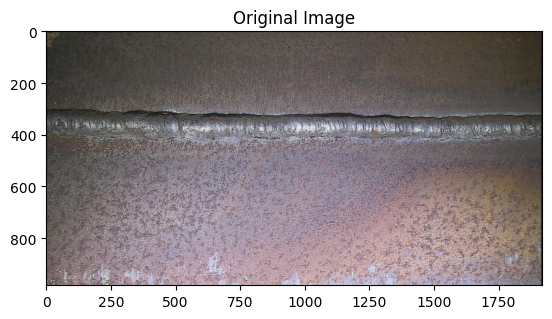

In [1]:
import cv2
from matplotlib import pyplot as plt

# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()


### Resize the image.

Resizing an image can be useful for a variety of reasons. One common reason is to reduce the computational complexity of image processing algorithms. Large images require more processing time and memory, which can be a bottleneck in some applications. By resizing the image to a smaller size, the processing time and memory requirements can be reduced, allowing for faster and more efficient processing. Additionally, resizing can also be used to normalize the size of images in a dataset, which can be important for training machine learning models that require images of a consistent size.

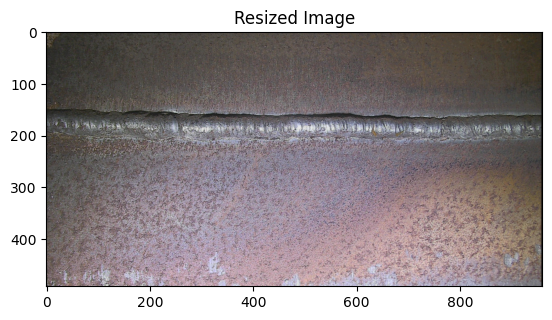

In [4]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Resize the image to half its size
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

# Display the resized image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()

### Convert to Grayscale.

Grayscale conversion is the process of converting an image from RGB (Red-Green-Blue) color space to a single channel grayscale image. Grayscale images are easier to process and require less storage space.

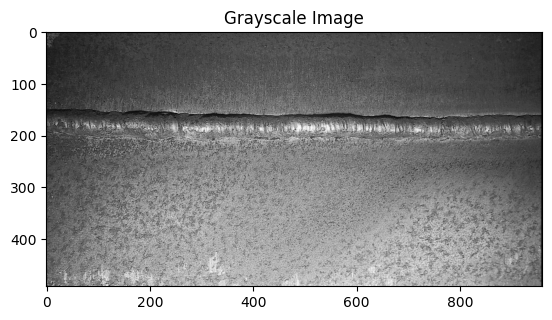

In [5]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.show()


## Image Pre-Processing

### Edge detection.

Edge detection is a technique used to extract the boundaries of objects in an image. The Canny edge detection algorithm used in this code detects edges by looking for areas in the image where there is a rapid change in pixel intensity.

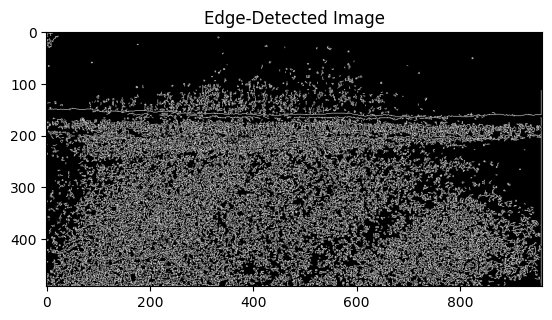

In [6]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply Edge detector
edges = cv2.Canny(gray_img, 100, 200)

# Display the edge-detected image
plt.imshow(edges, cmap='gray')
plt.title("Edge-Detected Image")
plt.show()


### Smoothing.

Image smoothing, also known as blurring or low-pass filtering, is a technique used to reduce noise and detail in an image. The basic idea is to replace the pixel values in the image with an average of the pixel values in its neighborhood. There are various smoothing filters available, such as the mean filter, median filter, and Gaussian filter. Gaussian blur is a widely used smoothing filter that uses a weighted average of pixel values in a circular region around the target pixel, with the weights given by the Gaussian function. The advantage of Gaussian blur over other smoothing filters is that it preserves edges and sharp transitions in the image while reducing noise and detail. This makes it a popular choice for a wide range of image processing tasks, such as feature detection, segmentation, and object recognition.

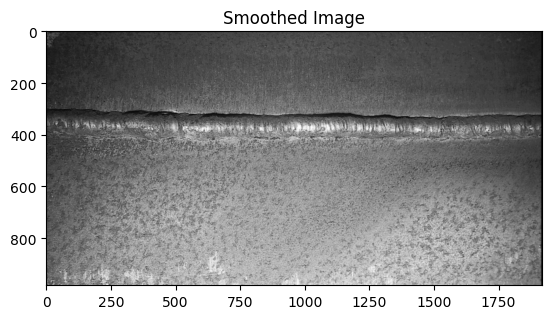

In [37]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply Gaussian filter
blur = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Display the smoothed image
plt.imshow(blur, cmap='gray')
plt.title("Smoothed Image")
plt.show()


## Thresholding.

Image thresholding is a technique used to separate an image into two parts based on pixel intensity. Pixels with intensity above a certain threshold are set to one value, while pixels below the threshold are set to another value. In this code, binary thresholding is used to separate the foreground and background of an image.

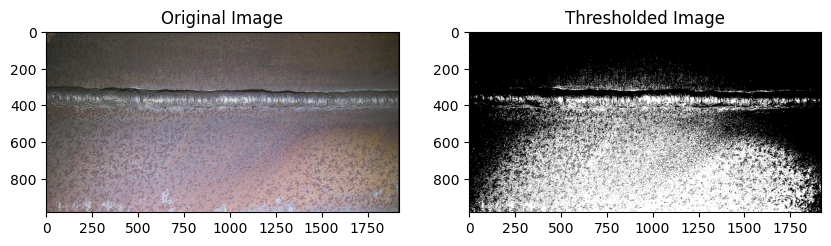

In [39]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply threshold
ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(thresh, cmap='gray')
ax2.set_title("Thresholded Image")

plt.show()

### Otsu 
The main difference between cv2.THRESH_BINARY and OTSU thresholding is the way the threshold value is determined. With cv2.THRESH_BINARY, a threshold value is manually chosen and applied to the image. In contrast, Otsu thresholding automatically calculates an optimal threshold value based on the image histogram, with the aim of minimizing the variance within each of the resulting binary image classes. Notice that if the image histogram is not bimodal, or the image has poor contrast, the Otsu threshold may not be optimal, and a manual threshold (such as cv2.THRESH_BINARY) may be a better choice.

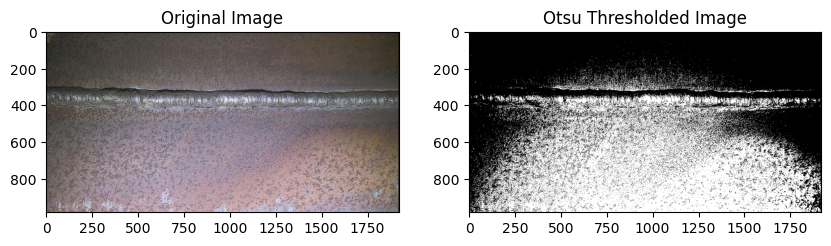

In [40]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(thresh_img, cmap='gray')
ax2.set_title("Otsu Thresholded Image")

plt.show()

## Morphological Operations.

Morphological operations are a set of mathematical operations that are used to process images in order to extract features, remove noise, or enhance the visual appearance of an image. These operations are based on the use of a "structuring element," which is a small binary image that is used to scan the input image. The structuring element is moved over the input image, and for each pixel, the values of the pixels within the neighborhood defined by the structuring element are combined to produce a new output value. The most common morphological operations are erosion, dilation, opening, closing, and morphological gradient, each of which has specific uses and applications in image processing. These operations are widely used in fields such as computer vision, medical imaging, and remote sensing.

### Erosion

Erosion is a morphological operator that is used to remove small details and boundaries of objects in an image. It works by moving a small "structuring element" over the image and replacing each pixel with the minimum value of the pixels in the neighborhood defined by the structuring element. This causes the boundaries of objects to erode away, making them smaller and smoother. Erosion is often used as a pre-processing step in image analysis and can be used to remove noise, separate overlapping objects, or extract important features from an image.

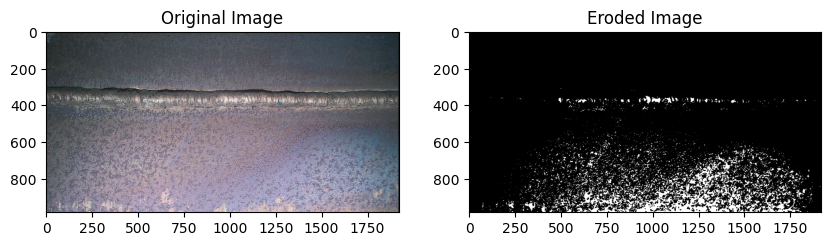

In [48]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element for erosion
kernel = np.ones((5, 5), np.uint8)

# Apply erosion
erosion = cv2.erode(thresh, kernel, iterations=1)

# Display the original and eroded images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img, cmap='gray')
ax1.set_title("Original Image")

ax2.imshow(erosion, cmap='gray')
ax2.set_title("Eroded Image")

plt.show()

### Dilation

Dilation is another morphological operator in image processing that is the opposite of erosion. Instead of shrinking the boundaries of objects, dilation expands them by replacing each pixel with the maximum value of the pixels in the neighborhood defined by the structuring element. This causes objects to grow and merge together, filling in small gaps and smoothing out the edges. Like erosion, dilation is often used as a pre-processing step in image analysis and can be used to join broken lines, connect disjoint objects, or highlight important features in an image.

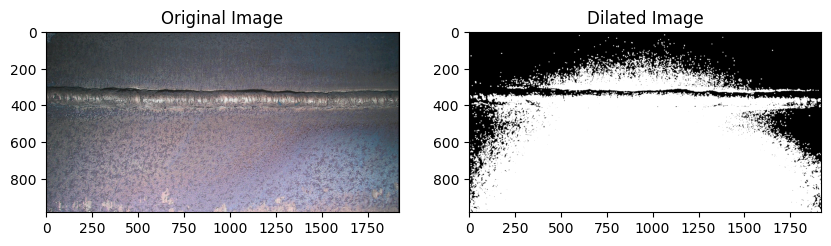

In [47]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply dilation
kernel = np.ones((5,5),np.uint8)
dilated_img = cv2.dilate(thresh_img, kernel, iterations=1)

# Display the original and the dilated image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img, cmap='gray')
ax1.set_title("Original Image")

ax2.imshow(dilated_img, cmap='gray')
ax2.set_title("Dilated Image")

plt.show()


## Opening

Opening is a morphological operation that is formed by applying an erosion operation followed by a dilation operation on an image. The overall effect of the opening operation is to remove small objects and smooth the edges of larger objects in the image. Opening can be used to remove noise, separate overlapping objects, or enhance important features in an image. It is often used as a pre-processing step before more complex operations, such as object detection or segmentation.

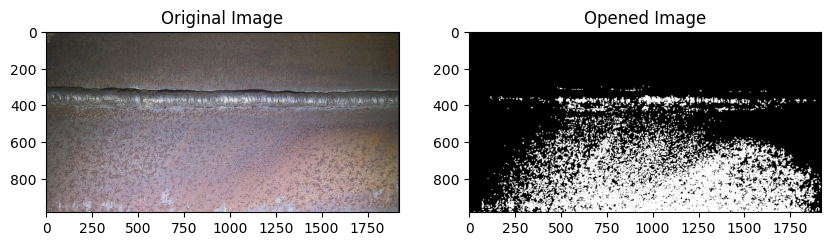

In [46]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform opening operation to clean up the image
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel)

# Display the original and opened images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(opening, cmap='gray')
ax2.set_title("Opened Image")

plt.show()


## Closing

Closing is a morphological operation that is formed by applying a dilation operation followed by an erosion operation on an image. The overall effect of the closing operation is to fill in gaps between objects and join nearby objects together. Closing can be used to remove small holes, connect broken lines, or remove isolated objects in an image. It is often used as a pre-processing step before more complex operations, such as object detection or segmentation.

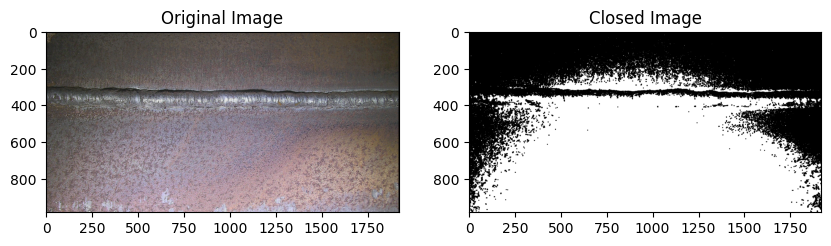

In [49]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform closing to fill in small gaps
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(closing, cmap='gray')
ax2.set_title("Closed Image")

plt.show()


### Morphological gradient

Morphological gradient is a morphological operator that is formed by subtracting the result of an erosion operation from the result of a dilation operation on an image. The resulting image highlights the boundaries of objects in the original image, showing where the intensity changes the most. The morphological gradient can be used to extract the edges of objects, as well as to enhance the contrast between objects and their surroundings. It can also be used to detect the locations of objects that have a specific shape or size. The morphological gradient is a useful tool in image processing and is often used as a pre-processing step before more complex operations, such as object detection or segmentation.

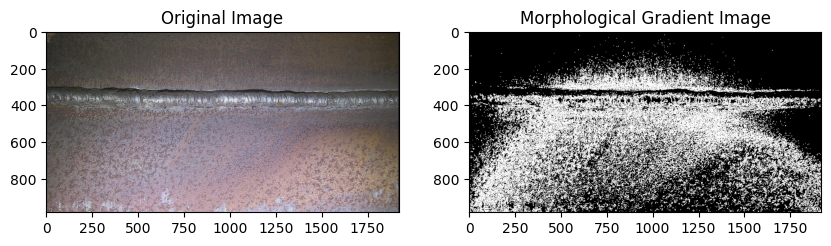

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform morphological operations to create the morphological gradient
kernel = np.ones((3, 3), np.uint8)
gradient_img = cv2.morphologyEx(thresh_img, cv2.MORPH_GRADIENT, kernel)

# Display the original image and the morphological gradient
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(gradient_img, cmap='gray')
ax2.set_title("Morphological Gradient Image")

plt.show()


## Image correction

### Contrast Limited Adaptive Histogram Equalization (CLAHE)

Contrast Limited Adaptive Histogram Equalization (CLAHE) is an image processing technique that enhances the contrast of an image by transforming the intensity levels of the image. Unlike traditional histogram equalization, CLAHE works by dividing the image into small regions and applying adaptive histogram equalization to each region independently, which avoids over-amplifying noise and preserves local contrast. 

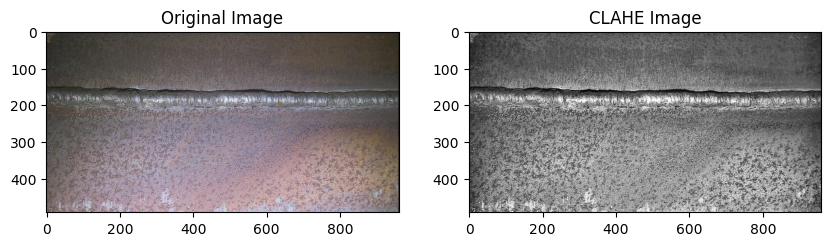

In [15]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray_img)

# Display the original and CLAHE images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(clahe_img, cmap='gray')
ax2.set_title("CLAHE Image")

plt.show()


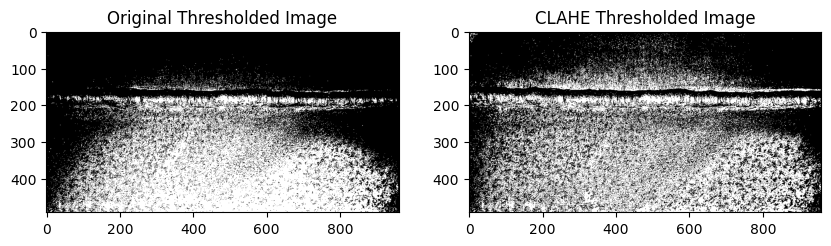

In [17]:

ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(clahe_img, 127, 255, cv2.THRESH_BINARY)

# Display the original and CLAHE images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(thresh, cmap='gray')
ax1.set_title("Original Thresholded Image")

ax2.imshow(thresh2, cmap='gray')
ax2.set_title("CLAHE Thresholded Image")

plt.show()

### Inpainting

Inpainting is an image processing technique that involves reconstructing lost or damaged parts of an image by filling in the missing pixels using the surrounding pixels as a reference. It is useful for repairing old or damaged images, removing unwanted objects or artifacts from images, and restoring images from incomplete data. Inpainting can be performed using various algorithms, such as diffusion-based methods, texture synthesis-based methods, and exemplar-based methods. It can help improve the quality and usefulness of images by restoring lost or damaged information and making images more visually appealing.

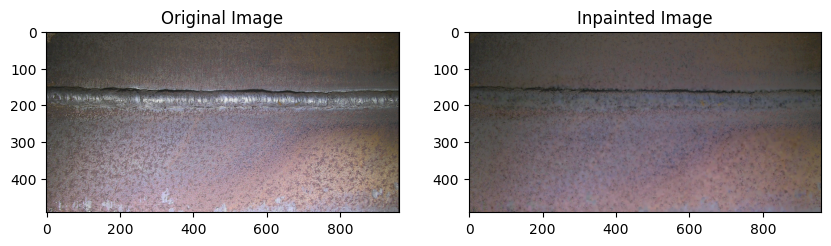

In [18]:

# Apply inpainting
mask = cv2.threshold(clahe_img, 100, 255, cv2.THRESH_BINARY)[1]
inpaint_img = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Display the original and inpainted images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(inpaint_img, cv2.COLOR_BGR2RGB))
ax2.set_title("Inpainted Image")

plt.show()


### Sobel Edge Detection

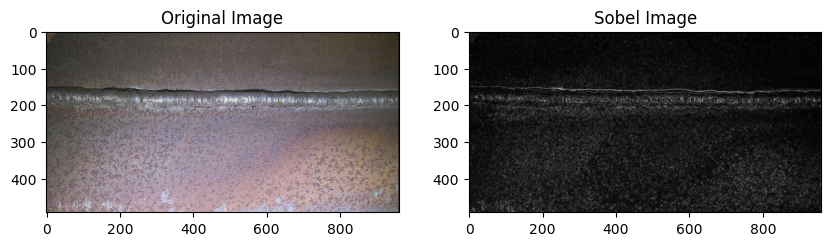

In [20]:
import numpy as np

# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)
sobel_img = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the original and Sobel images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(sobel_img, cmap='gray')
ax2.set_title("Sobel Image")

plt.show()

## Feature Extraction

### HOG.

Histogram of Oriented Gradients (HOG) is a feature extraction technique used in computer vision and image processing. It computes the local gradient orientations of an image and creates a histogram of those orientations. The histograms are then normalized to reduce the effect of variations in lighting and contrast. HOG is often used for object detection and recognition tasks, as it is able to capture shape and edge information in an image. Additionally, it is relatively simple and efficient to compute, making it a popular choice for real-time applications.

<ipython-input-23-29cf93b2db86>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feats, hog_img = skf.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


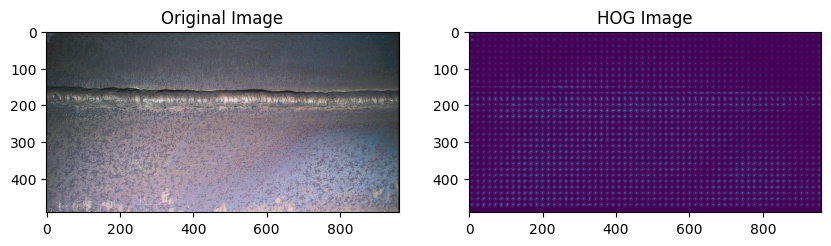

In [23]:
import skimage.feature as skf
import matplotlib.pyplot as plt
from skimage import data

# Compute HOG features
hog_feats, hog_img = skf.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Display the original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img)
ax1.set_title("Original Image")

ax2.imshow(hog_img)
ax2.set_title("HOG Image")

plt.show()

### ORB.

ORB (Oriented FAST and Rotated BRIEF) is a feature detection and description algorithm used in computer vision to identify and match features in images. ORB works by detecting and describing keypoints in an image, and then matching them to keypoints in another image to identify similarities or differences. It is robust to scale and rotation changes, making it ideal for use in object recognition and tracking applications.

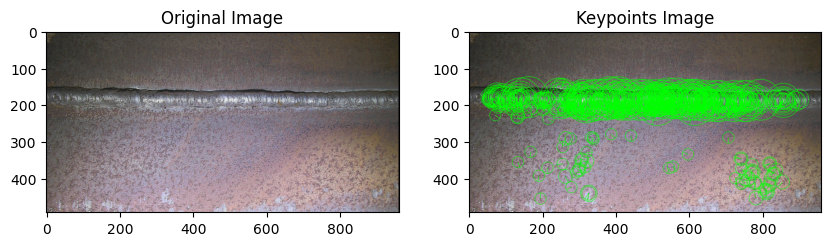

In [29]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB feature detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_img, None)

# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original and keypoints image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
ax2.set_title("Keypoints Image")

plt.show()

### BRISK

BRISK (Binary Robust Invariant Scalable Keypoints) is a feature detection algorithm that finds points of interest in an image that are robust to changes in lighting, rotation, and scale. It uses a binary descriptor, which makes it fast and efficient, and is able to detect features with varying scales and orientations. The main advantages of BRISK are its speed and efficiency, making it suitable for real-time applications such as robotics and augmented reality.

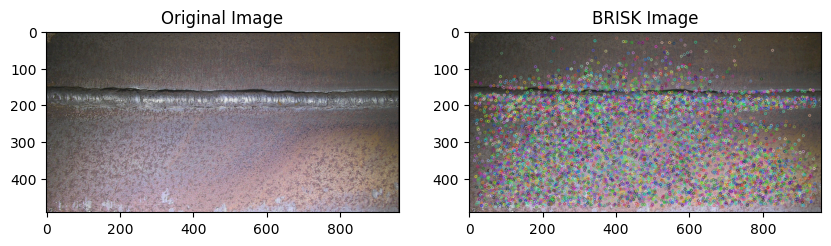

In [31]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the BRISK feature detector
brisk = cv2.BRISK_create()

# Find keypoints and descriptors
keypoints, descriptors = brisk.detectAndCompute(gray_img, None)

# Draw the keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Display the original and BRISK images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
ax2.set_title("BRISK Image")

plt.show()

## Image Segmentation

### K-means

K-means is a clustering algorithm that aims to partition n observations into k clusters. The algorithm works by iteratively assigning each observation to a cluster and then updating the cluster centroid based on the new assignments. The process continues until the assignment of observations to clusters no longer changes.

The main advantages of k-means include its simplicity, speed, and scalability. K-means can handle large datasets and is often used in real-world applications such as image segmentation, document clustering, and market segmentation. 

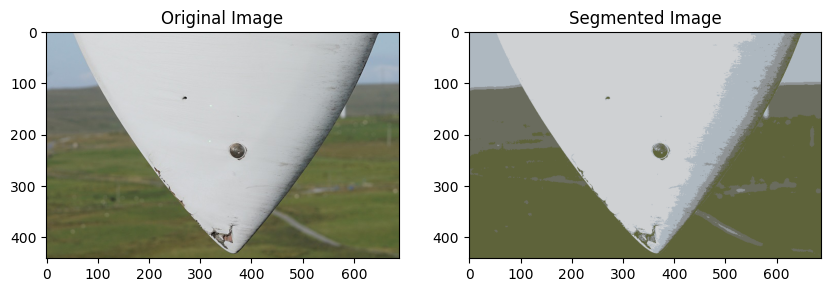

In [34]:
# Reshape the image into a 2D array of pixels
pixel_vals = img.reshape((-1,3))

# Convert the pixel values to float32
pixel_vals = np.float32(pixel_vals)

# Set the criteria for the k-means algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Set the number of clusters (k)
k = 5

# Run the k-means algorithm
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8
centers = np.uint8(centers)

# Reshape the labels back into the original image shape
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape(img.shape)

# Display the original and segmented images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Segmented Image")

plt.show()

### Watershed algorithm

Sure, the watershed algorithm is a method in image processing used to segment an image into different regions or objects. This algorithm is based on the idea of considering the image as a topographic map, where the high intensity pixels are the peaks and the low intensity pixels are the valleys. The algorithm starts by flooding the valleys with water and the water is stopped when it meets at the peaks. The points at which the water stops form the boundaries of the segmented regions. The main advantage of the watershed algorithm is that it can segment objects that are touching or overlapping, which can be difficult to achieve with other segmentation methods.

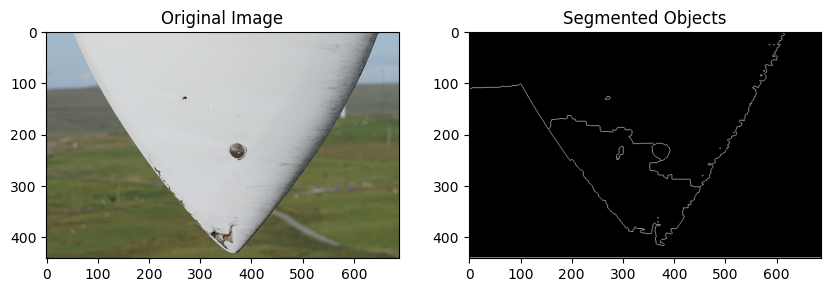

In [33]:
# Load the image
img_path = 'images/img1.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform morphological operations to clean up the image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=2)

# Perform segmentation using the distance transform and watershed algorithm
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opening, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)

# Create a mask for the segmented objects
mask = np.zeros(img.shape[:2], np.uint8)
mask[markers==-1] = 255

# Display the original image and the segmented objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(mask, cmap='gray')
ax2.set_title("Segmented Objects")

plt.show()